In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("/home/tegbe/2023/ccl/timeRobert/data/time-series-new.xlsx")
df.head(5)

,UNIQUEID,DATE,BEAN,THP,CONDENSATE,GAS,OIL,PrDay,WATER,SAND,PD_Oil Rate (stb/day),GOR (scf/stb),WaterCut (%)
0,Well 1,1977-04-01,20,650,0,479.0,2373.0,5.0,0.0,0.8,474.600000,201.854193,0.0
1,Well 1,1977-05-01,20,650,0,2199.0,9918.0,18.9,0.0,3.2,524.761905,221.718088,0.0
2,Well 1,1977-06-01,24,650,0,10200.0,31807.0,29.0,0.0,13.3,1096.793103,320.684126,0.0
3,Well 1,1977-07-01,32,560,0,24739.0,73302.0,30.9,0.0,4.8,2372.233010,337.494202,0.0
4,Well 1,1977-08-01,48,486,0,37489.0,103426.0,30.8,0.0,6.5,3357.987013,362.471719,0.0


In [3]:
df['UNIQUEID'].unique()

array(['Well 1'], dtype=object)

In [4]:
df_trim = df.drop(columns='UNIQUEID', axis=1)
df_trim.head(5)

,DATE,BEAN,THP,CONDENSATE,GAS,OIL,PrDay,WATER,SAND,PD_Oil Rate (stb/day),GOR (scf/stb),WaterCut (%)
0,1977-04-01,20,650,0,479.0,2373.0,5.0,0.0,0.8,474.600000,201.854193,0.0
1,1977-05-01,20,650,0,2199.0,9918.0,18.9,0.0,3.2,524.761905,221.718088,0.0
2,1977-06-01,24,650,0,10200.0,31807.0,29.0,0.0,13.3,1096.793103,320.684126,0.0
3,1977-07-01,32,560,0,24739.0,73302.0,30.9,0.0,4.8,2372.233010,337.494202,0.0
4,1977-08-01,48,486,0,37489.0,103426.0,30.8,0.0,6.5,3357.987013,362.471719,0.0


## Data Visualization

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

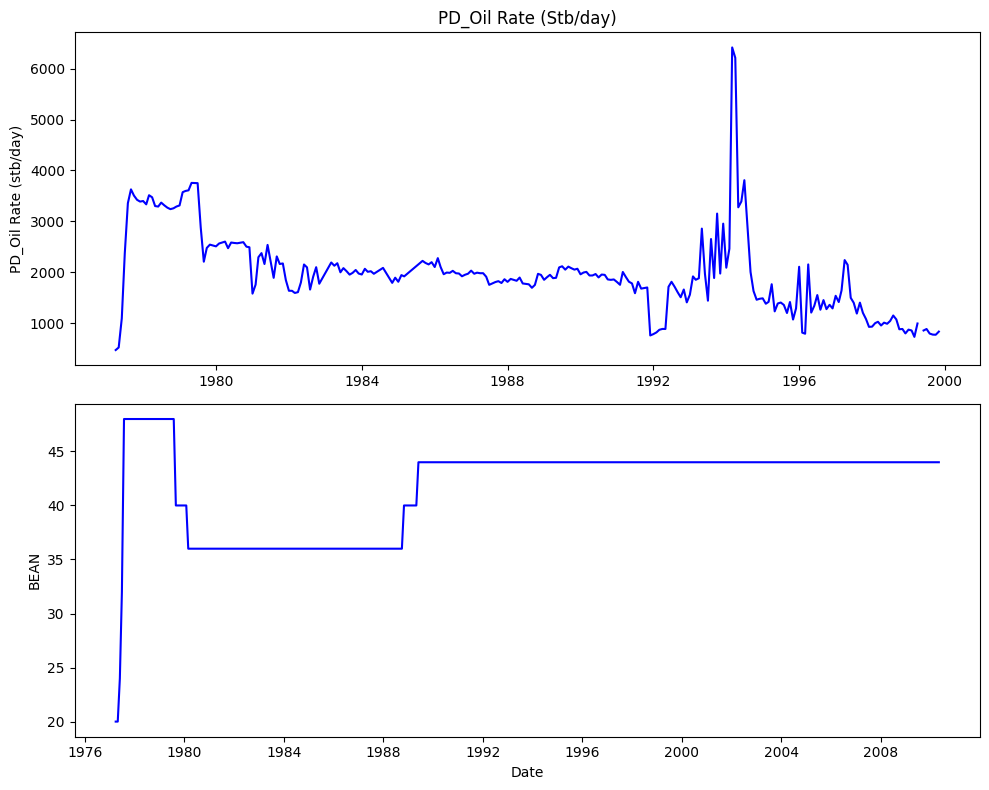

In [6]:
import matplotlib.pyplot as plt

# Assuming df_trim is your DataFrame containing the specified columns
# Replace 'df_trim' and column names with your actual data

# Create subplots with a specific size for the entire figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plotting in the first subplot (0)
axes[0].plot(df_trim['DATE'], df_trim['PD_Oil Rate (stb/day)'],  color='blue')
axes[0].set_title('PD_Oil Rate (Stb/day)')
axes[0].set_ylabel('PD_Oil Rate (stb/day)')  # Set Y-axis label if needed

# Plotting in the second subplot (1)
axes[1].plot(df_trim['DATE'], df_trim['BEAN'], label='BEAN',  color='blue')
axes[1].set_ylabel('BEAN')  # Set Y-axis label if needed

# Show the plot
plt.xlabel('Date')  # Set X-axis label if needed
plt.tight_layout()  # Adjust layout
plt.show()


In [7]:
df_pdoil = df_trim[['DATE', 'PD_Oil Rate (stb/day)']]
df_pdoil.head(5)

,DATE,PD_Oil Rate (stb/day)
0,1977-04-01,474.600000
1,1977-05-01,524.761905
2,1977-06-01,1096.793103
3,1977-07-01,2372.233010
4,1977-08-01,3357.987013


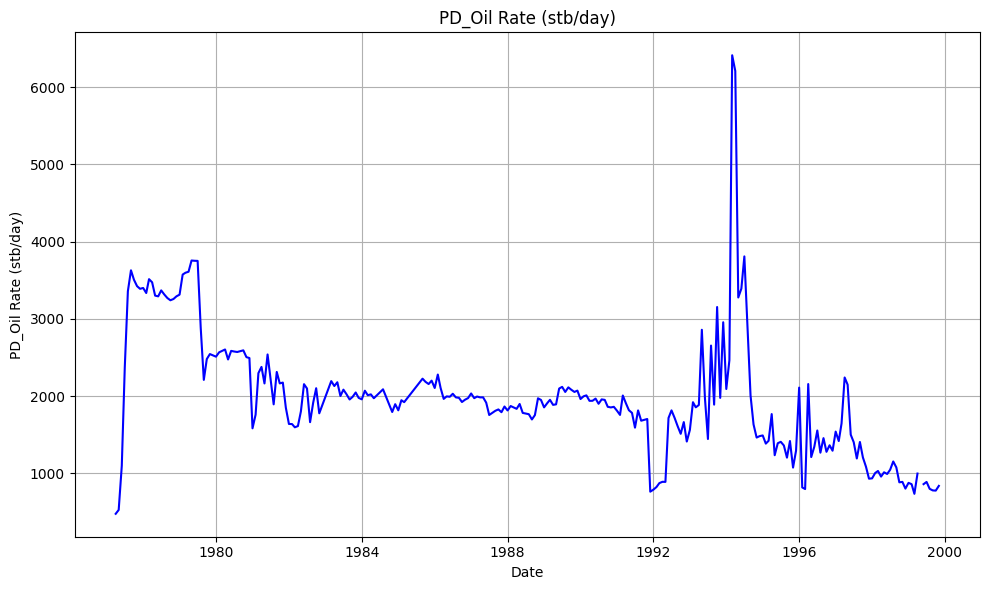

In [8]:
import matplotlib.pyplot as plt

# Assuming df_trim is your DataFrame containing the specified columns
# Replace 'df_trim' and column names with your actual data

# Plotting 'PD_Oil Rate (stb/day)' against 'DATE'
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(df_pdoil['DATE'], df_pdoil['PD_Oil Rate (stb/day)'],  color='blue')
plt.title('PD_Oil Rate (stb/day)')
plt.xlabel('Date')
plt.ylabel('PD_Oil Rate (stb/day)')

# Show the plot
plt.grid(True)  # Add grid if needed
plt.tight_layout()
plt.show()


## Data preparation

In [11]:
import pandas as pd

def train_test_split_by_date(df, date_column, target_column, cutoff_date):
    """
    Split the data into training and testing sets based on a cutoff date.

    Parameters:
    - df: DataFrame containing the data
    - date_column: Name of the column containing dates
    - target_column: Name of the column containing the target variable
    - cutoff_date: Date to split the data for training and testing

    Returns:
    - train_data: DataFrame of training data
    - test_data: DataFrame of testing data
    """

    # Make a copy of the DataFrame
    df = df.copy()

    # Convert date_column to datetime
    df[date_column] = pd.to_datetime(df[date_column])

    # Split the data based on the cutoff date
    train_data = df[df[date_column] < cutoff_date]
    test_data = df[df[date_column] >= cutoff_date]

    # Extract X_train, y_train, X_test, y_test
    X_train = train_data.drop(columns=[target_column])
    y_train = train_data[target_column]
    X_test = test_data.drop(columns=[target_column])
    y_test = test_data[target_column]

    return X_train, y_train, X_test, y_test


# Example usage:
# Replace 'df', 'date_column', 'target_column', and 'cutoff_date' with your actual data and column names

# Assuming 'df' is your DataFrame and 'DATE' is the date column
# 'PD_Oil Rate (stb/day)' is the target column
# 'cutoff_date' is the date you want to split the data on

# Example usage:
X_train, y_train, X_test, y_test = train_test_split_by_date(df_pdoil, 'DATE', 'PD_Oil Rate (stb/day)', '1999-01-01')

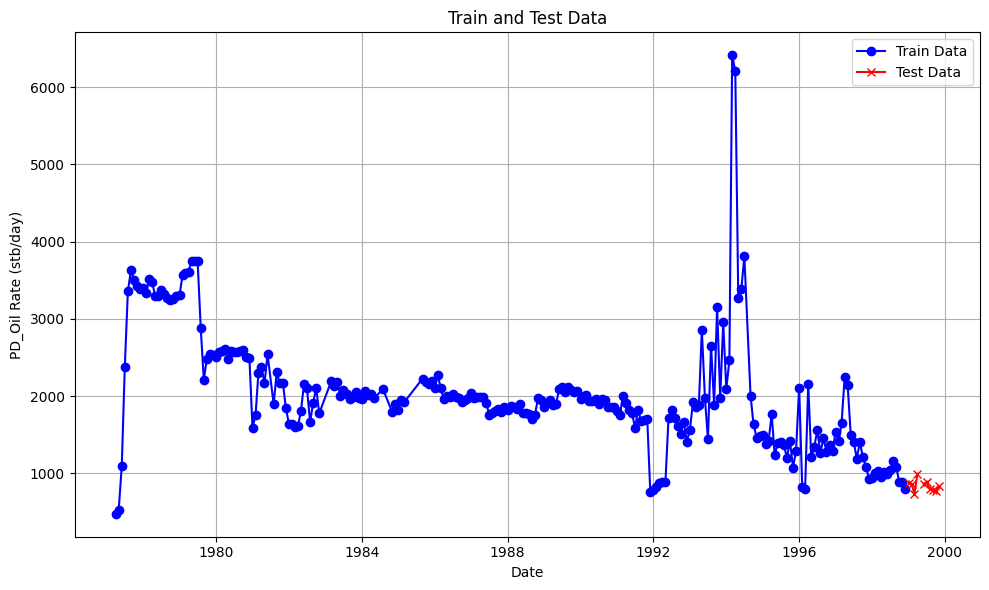

In [12]:
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are obtained from train_test_split_by_date function

# Plotting train data
plt.figure(figsize=(10, 6))

# Scatter plot for train data
plt.plot(X_train['DATE'], y_train, color='blue', label='Train Data', marker='o')

# Scatter plot for test data
plt.plot(X_test['DATE'], y_test, color='red', label='Test Data', marker='x')

plt.title('Train and Test Data')
plt.xlabel('Date')
plt.ylabel('PD_Oil Rate (stb/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
